# Dataset para ver la relacion entre distintos hábitos y la felicidad de las personas

In [43]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Importo el CSV  y relleno con un no los NAN que habia en la columna Mental health condition

In [56]:
df_3 = pd.read_csv("../Datasets/Mental_Health_lifestyle_Dataset.csv")
df_3.fillna("No", inplace=True)


In [57]:
df_3.head()

,Country,Age,Gender,Exercise Level,Diet Type,Sleep Hours,Stress Level,Mental Health Condition,Work Hours per Week,Screen Time per Day (Hours),Social Interaction Score,Happiness Score
0,Brazil,48,Male,Low,Vegetarian,6.3,Low,No,21,4.0,7.8,6.5
1,Australia,31,Male,Moderate,Vegan,4.9,Low,PTSD,48,5.2,8.2,6.8
2,Japan,37,Female,Low,Vegetarian,7.2,High,No,43,4.7,9.6,9.7
3,Brazil,35,Male,Low,Vegan,7.2,Low,Depression,43,2.2,8.2,6.6
4,Germany,46,Male,Low,Balanced,7.3,Low,Anxiety,35,3.6,4.7,4.4


In [58]:
df_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Country                      3000 non-null   object 
 1   Age                          3000 non-null   int64  
 2   Gender                       3000 non-null   object 
 3   Exercise Level               3000 non-null   object 
 4   Diet Type                    3000 non-null   object 
 5   Sleep Hours                  3000 non-null   float64
 6   Stress Level                 3000 non-null   object 
 7   Mental Health Condition      3000 non-null   object 
 8   Work Hours per Week          3000 non-null   int64  
 9   Screen Time per Day (Hours)  3000 non-null   float64
 10  Social Interaction Score     3000 non-null   float64
 11  Happiness Score              3000 non-null   float64
dtypes: float64(4), int64(2), object(6)
memory usage: 281.4+ KB


## Creo un dataframe con las distintas variables que en un principio considero que tendrían influencia en la felicidad

In [59]:
df3 = df_3[["Sleep Hours", "Work Hours per Week", "Screen Time per Day (Hours)", "Happiness Score", "Social Interaction Score"]]



In [60]:
df3

,Sleep Hours,Work Hours per Week,Screen Time per Day (Hours),Happiness Score,Social Interaction Score
0,6.3,21,4.0,6.5,7.8
1,4.9,48,5.2,6.8,8.2
2,7.2,43,4.7,9.7,9.6
3,7.2,43,2.2,6.6,8.2
4,7.3,35,3.6,4.4,4.7
...,...,...,...,...,...
2995,7.0,29,4.4,5.9,9.7
2996,7.1,47,7.4,9.9,6.3
2997,6.0,23,3.9,4.1,5.2
2998,5.7,51,4.3,4.1,5.9


## Veo que correlación tienen las 4 variables del dataframe respecto de la variable felicidad

In [76]:


# Suponiendo que tu DataFrame se llama df
variables = ["Sleep Hours", "Work Hours per Week", "Screen Time per Day (Hours)", "Social Interaction Score"]
objetivo = "Happiness Score"

correlaciones = df3[variables].corrwith(df3[objetivo])
print(correlaciones)


Sleep Hours                    0.017389
Work Hours per Week            0.010837
Screen Time per Day (Hours)    0.016790
Social Interaction Score      -0.040236
dtype: float64


## La correlación es mínima, por lo que agrupo en los siguientes pasos por las variables : Mental Health Condition , Stress Level y Diet Type 

In [77]:
agrupado_condition = df_3.groupby('Mental Health Condition')["Happiness Score"].mean()


In [78]:
agrupado_condition

Mental Health Condition
Anxiety       5.258121
Bipolar       5.471553
Depression    5.341552
No            5.452437
PTSD          5.457692
Name: Happiness Score, dtype: float64

## Genero la gráfica de la agrupación por la condición mental

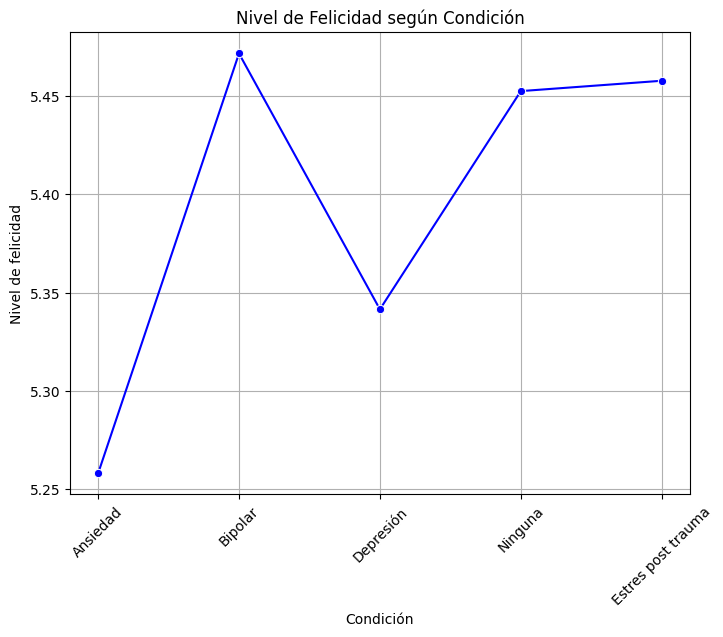

In [81]:



# Crear DataFrame correctamente
data = {
    "Condición": ["Ansiedad", "Bipolar", "Depresión", "Ninguna", "Estres post trauma"],
    "Happiness Score": [5.258121, 5.471553, 5.341552, 5.452437, 5.457692]
}
df_datacondition = pd.DataFrame(data)

# Graficar línea asegurando que el DataFrame se usa correctamente
plt.figure(figsize=(8, 6))
sns.lineplot(data=df_datacondition, x="Condición", y="Happiness Score", marker="o", color="blue")
plt.title("Nivel de Felicidad según Condición")
plt.ylabel("Nivel de felicidad")
plt.xlabel("Condición")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


In [ ]:
agrupado_stress = df_3.groupby('Stress Level')["Happiness Score"].mean()

In [ ]:
agrupado_stress

Stress Level
High        5.440419
Low         5.408631
Moderate    5.335354
Name: Happiness Score, dtype: float64

## Genero la gráfica de la agrupación por el estres

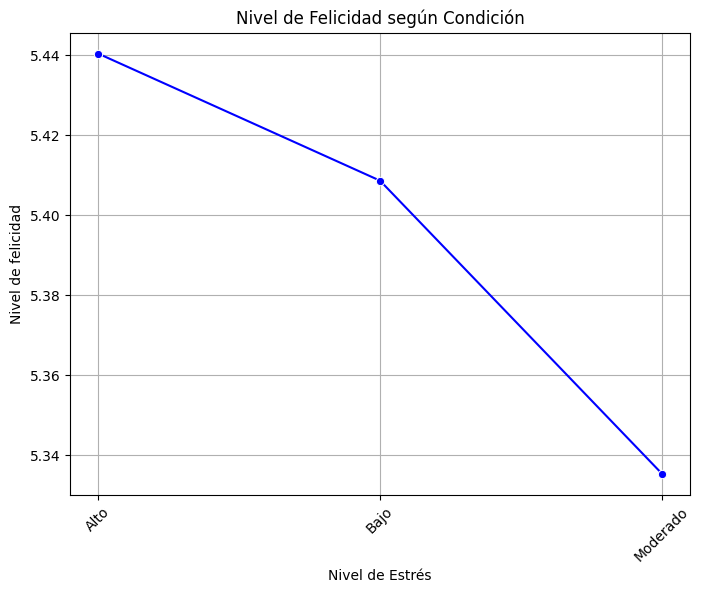

In [ ]:
data2 = {
    "Nivel de Stress": ["Alto", "Bajo", "Moderado"],
    "Happiness Score": [5.440419, 5.408631, 5.335354]
}
df_datacondition2 = pd.DataFrame(data2)

# Graficar línea asegurando que el DataFrame se usa correctamente
plt.figure(figsize=(8, 6))
sns.lineplot(data=df_datacondition2, x="Nivel de Stress", y="Happiness Score", marker="o", color="blue")
plt.title("Nivel de Felicidad según estres")
plt.ylabel("Nivel de felicidad")
plt.xlabel("Nivel de Estrés")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [ ]:
agrupado_dieta = df_3.groupby('Diet Type')["Happiness Score"].mean()

In [ ]:
agrupado_dieta

Diet Type
Balanced      5.247680
Junk Food     5.436264
Keto          5.339616
Vegan         5.287086
Vegetarian    5.664527
Name: Happiness Score, dtype: float64

## Genero la gráfica de la agrupación por el tipo de dieta

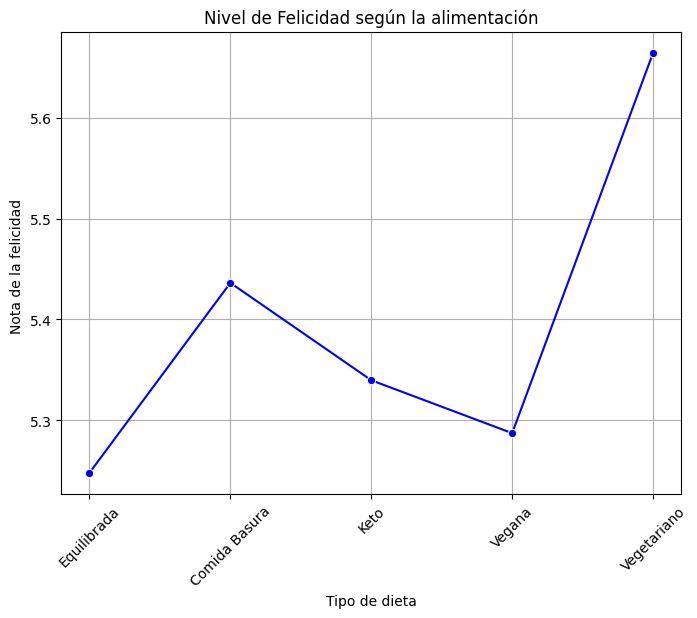

In [75]:
data3 = {
    "Tipo de comida": ["Equilibrada", "Comida Basura", "Keto","Vegana","Vegetariano"],
    "Happiness Score": [5.247680, 5.436264, 5.339616, 5.287086,5.664527]
}
df_datacondition3 = pd.DataFrame(data3)

# Graficar línea asegurando que el DataFrame se usa correctamente
plt.figure(figsize=(8, 6))
sns.lineplot(data=df_datacondition3, x="Tipo de comida", y="Happiness Score", marker="o", color="blue")
plt.title("Nivel de Felicidad según la alimentación")
plt.ylabel("Nota de la felicidad ")
plt.xlabel("Tipo de dieta")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()
#https://mundo.culturizando.com/10-beneficios-vegetariano/#:~:text=Los%20estudios%20revelan%20que%20los%20vegetarianos%20probablemente%20son,comparado%20con%20los%20que%20comen%20pescado%20y%20carne.